# **머신러닝 실습 과제 Task 3**

## 실습과제 소개
- 본 과제는 주고객이 구매하지 않은 상품에 대해 요금이 청구되지 않도록 신용카드 회사가 `신용카드 사기 거래를 식별`하는 것이 목표입니다.
- Task3에서는 Randomforest와 GridSearch를 이용해서 예측을 수행해보려 합니다. 

## 파일 구성
 - **creditcard.csv**:

## 특성(feature), 타켓(target)설명
 - feature
     - `Time` : 거래 시간
     - `amount` : 거래 양
     - `v1` ~ `v23` feature들은 익명처리되어 있습니다.
 - target
     - `Class`: 0->정상 거래, 1->사기 거래, 

## 평가 측도
 - **`Accuracy`**: 높을수록 좋음

## 제출 안내
 - 스마트리드 과제란에 주피터 노트북 파일을 제출 (본인학번_이름_ML_homework3.ipynb)로 저장.

## Task2 과제 내용

In [3]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

import shutil
columns = shutil.get_terminal_size().columns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from IPython.display import Javascript
from IPython.display import display

In [4]:
# os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

### 데이터 불러오기 

In [5]:
pwd 

'C:\\Users\\chan\\Downloads\\202310101_홍길동_ML_homework_3'

In [6]:
data = pd.read_csv('./creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
features = list(data.columns)
features.remove('Class')

In [10]:
# Statistical descriptions of the features

features_stat = data.drop(['Class'], axis = 1)
features_stat.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### 결측치 확인 

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Separating independent variables and target variable

y = data['Class'] # target variable
X = data.drop('Class', axis = 1) # independent variables

# Constructing training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [13]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

In [14]:
y_train.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [15]:
z = list(y_train)

count0 = 0
count1 = 0

for i in z:
    if i == 0:
        count0 = count0 + 1
    elif i == 1:
        count1 = count1 + 1

# Class frequencies

class_label_train = ['Authentic', 'Fraud']
class_frequency_train = [count0, count1]

fig1 = px.pie(values = class_frequency_train,
             names = class_label_train,
             title = 'Frequency comparison of authentic and fraudulent transactions in the training dataset',
             template = 'ggplot2'
            )
fig1.show()

In [16]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_train_authentic = data_train[data_train['Class'] == 0]
data_train_fraudulent = data_train[data_train['Class'] == 1]

### train set에서 사기가 아닌 거래와 사기 거래의 양과 시간

In [17]:
class_list_train = list(y_train)
fraud_status_train = []
for i in range(len(class_list_train)):
    fraud_status_train.append(bool(class_list_train[i]))

fig1 = px.scatter(data_train,
                 x = 'Time',
                 y = 'Amount', 
                 facet_col = fraud_status_train,
                 color = fraud_status_train,
                 title = 'Amount vs Time for the training set',
                 template = 'ggplot2'
                )
fig1.show()

### Random over-sampling (ROS)
- train dataset의 균형을 맞추기 위해 다수 클래스의 하위 집합을 사용.

Class frequencies after over-sampling:
Class
0    227465
1    227465
Name: count, dtype: int64


<Axes: title={'center': 'Class frequencies after over-sampling'}, xlabel='Class'>

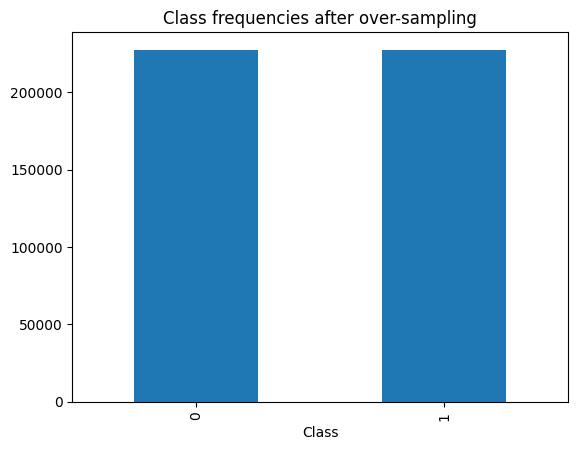

In [18]:
data_train_fraudulent_over = data_train_fraudulent.sample(len(data_train_authentic), replace = 'True')
data_train_over = pd.concat([data_train_authentic, data_train_fraudulent_over], axis = 0)

X_train_over = data_train_over.drop('Class', axis = 1)
y_train_over = data_train_over['Class']

print('Class frequencies after over-sampling:')
print(y_train_over.value_counts())
y_train_over.value_counts().plot(kind = 'bar', title = 'Class frequencies after over-sampling')

In [19]:
# Amount vs Time for authentic and fraudulent transactions in the training set after random over-sampling

class_list = list(y_train_over)
fraud_status = []
for i in range(len(class_list)):
    fraud_status.append(bool(class_list[i]))

fig1 = px.scatter(data_train_over,
                 x = 'Time',
                 y = 'Amount', 
                 facet_col = fraud_status,
                 color = fraud_status,
                 title = 'Amount vs Time',
                 template = 'ggplot2'
                )
fig1.show()

### Feature Scaling
- 데이터 스케일링을 통해 모든 피처들의 샘플 데이터 분포와 범위를 동일하게 조정.
- 참고 : https://dacon.io/codeshare/4526

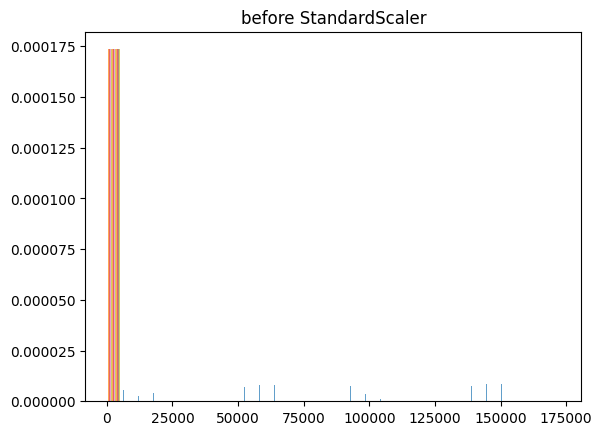

In [20]:
plt.hist(X_train_over, bins=30, alpha = 0.7, density = True)
plt.title('before StandardScaler')
plt.show()

In [21]:
scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train)

X_train_over_scaled_minmax = scaling.transform(X_train_over)
X_test_scaled_minmax = scaling.transform(X_test)

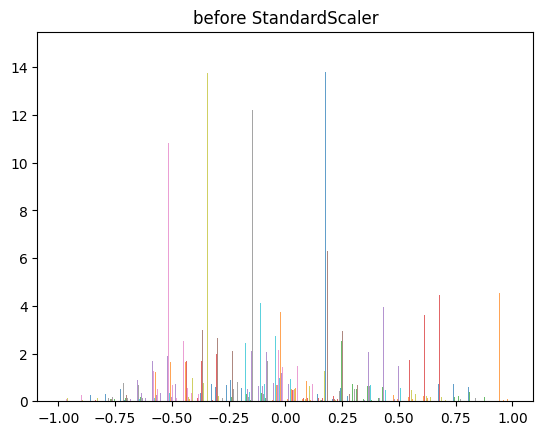

In [22]:
plt.hist(X_train_over_scaled_minmax, bins=30, alpha = 0.7, density = True)
plt.title('before StandardScaler')
plt.show()

### Logistic Regression
- 랜덤 오버 샘플링 미적용

In [23]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver= 'lbfgs').fit(X_train, y_train)

print('Train Accuracy : ', model.score(X_train, y_train))
print('Test Accuracy : ',model.score(X_test, y_test))

Train Accuracy :  0.9988764291513967
Test Accuracy :  0.9989993328885924


C:\Users\chan\anaconda3\envs\proj\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [24]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_test)


print('<Confusion matrix>')
print(confusion)

<Confusion matrix>
[[56823    27]
 [   30    82]]


Text(50.722222222222214, 0.5, 'True label')

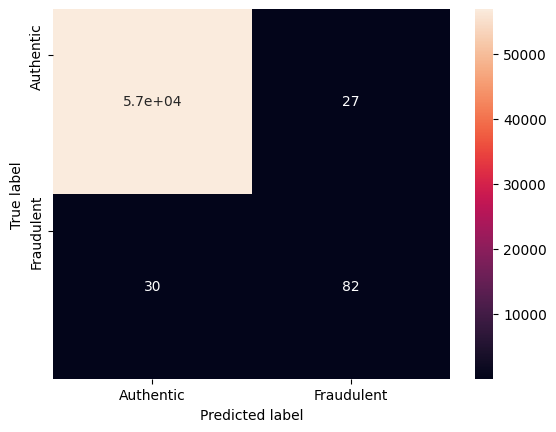

In [26]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [27]:
def performance_metric(confusion_matrix):
    
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]

    accuracy = (TP + TN)/(TP + FN + TN + FP)

    if (FP + TP == 0):
        precision = float('NaN')
    else:
        precision = TP/(TP + FP)
        
    if (TP + FN == 0):
        recall = float('NaN')
    else:
        recall = TP/(TP + FN)
    return accuracy, precision, recall, TP, FN, TN, FP

In [28]:
accuracy, precision, recall, TP, FN, TN, FP = performance_metric(confusion)
print(f'Accuracy:{accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

Accuracy:1.00, Precision: 0.75, Recall: 0.73


In [29]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP, FN],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN, FP],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()

## Task3 과제 내용

### Q1. model score 저장하는 판다스 프레임 생성
- Model name, Accuracy, precision, Recall 점수를 표시하는 컬럼이 있어야 합니다

In [177]:
columns = ['Model', 'Accuracy', 'Precision', 'Recall']
models = pd.DataFrame(columns=columns)
models

,Model,Accuracy,Precision,Recall


### Random Forest 

### Q2-1. Random Forest 로 모델 학습 후 예측

In [35]:
from sklearn.ensemble import RandomForestClassifier

en_model = RandomForestClassifier(random_state=123)
en_model.fit(X_train, y_train)

train_acc = en_model.score(X_train, y_train)
test_acc = en_model.score(X_test, y_test)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.999


In [36]:
pred_train_rf = en_model.predict(X_train)## Q2-1 답안을 작성하세요. ##
pred_test_rf = en_model.predict(X_test)## Q2-1 답안을 작성하세요. ##
pred_test_rf



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix

confusion_rf = confusion_matrix(y_test, pred_test_rf)


print('<Confusion matrix>')
print(confusion_rf)

<Confusion matrix>
[[56836    14]
 [   16    96]]


Text(50.722222222222214, 0.5, 'True label')

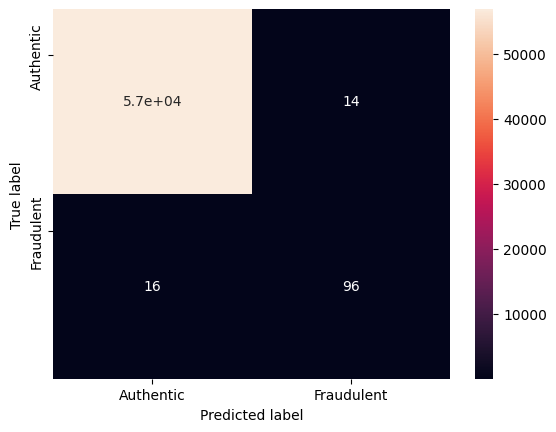

In [38]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion_rf, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

### Q2-2. Random Forest 로 학습한 모델의 performance metric score를 출력하고 저장하기

In [95]:
### Q2-2 답안을 작성하세요 ####
def performance_metric(confusion_matrix):
    
    TN_rf = confusion_matrix[0, 0]
    FP_rf = confusion_matrix[0, 1]
    FN_rf = confusion_matrix[1, 0]
    TP_rf = confusion_matrix[1, 1]

    accuracy_rf = (TP_rf + TN_rf)/(TP_rf + FN_rf + TN_rf + FP_rf)

    if (FP_rf + TP_rf == 0):
        precision = float('NaN')
    else:
        precision_rf = TP_rf/(TP_rf + FP_rf)
        
    if (TP_rf + FN_rf == 0):
        recall_rf = float('NaN')
    else:
        recall_rf = TP_rf/(TP_rf + FN_rf)
    return accuracy_rf, precision_rf, recall_rf, TP_rf, FN_rf, TN_rf, FP_rf
accuracy_rf, precision_rf, recall_rf, TP_rf, FN_rf, TN_rf, FP_rf = performance_metric(confusion_rf)
print(f'Accuracy:{accuracy_rf:.2f}, Precision: {precision_rf:.3f}, Recall: {recall_rf:.3f}')

Accuracy:1.00, Precision: 0.873, Recall: 0.857


In [178]:
new_row = {"Model": "RandomForest", "Accuracy":1.00,"Precision":0.873,"Recall":0.857}
models.loc[len(models)] = new_row

models

,Model,Accuracy,Precision,Recall
0,RandomForest,1.0,0.873,0.857


- GridSearchCV로 파라미터 찾기


- 참고 : https://scikit-learn.org/stable/modules/grid_search.html

### Q3. Grid Serach 를 이용해서 최적의 하이퍼파라미터 찾기 

In [8]:
estimator = RandomForestClassifier(random_state=123)

max_depth = [ depth for depth in range(1,6) ]
min_split = [ split for split in range(2,7 ) ]
trees = [ tree *10 for tree in range(5,10) ]


param_grids = {"max_depth": max_depth,
             "min_samples_split": min_split,
             "n_estimators":trees}


# 그리드서치
model_grid = GridSearchCV(estimator, param_grid=param_grids, scoring="accuracy", n_jobs = -1)
model_grid.fit(X_train, y_train)


print("best estimator: {}".format(model_grid.best_estimator_))
print("best parameters: {}".format(model_grid.best_params_))
print("best score: {}".format(model_grid.best_score_.round(3)))

### Q4. GridSerach를 이용해 파라미터 튜닝 적용하고 모델 학습하기

In [171]:

en_model_2 = RandomForestClassifier(criterion= 'entropy',max_depth= 20,
             min_samples_split=2,
             n_estimators= 50 ,random_state=123)
en_model_2.fit(X_train, y_train)
train_acc = en_model_2.score(X_train, y_train)### Q4 답안을 작성하세요 ####
test_acc = en_model_2.score(X_test, y_test)### Q4 답안을 작성하세요 ####

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 1.000
Test Accuracy: 1.000


In [172]:
pred_train_rf_2 = en_model_2.predict(X_train)### Q4 답안을 작성하세요 ####
pred_test_rf_2 = en_model_2.predict(X_test)### Q4 답안을 작성하세요 ####
pred_test_rf_2 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
from sklearn.metrics import confusion_matrix

confusion_rf_2 = confusion_matrix(y_test, pred_test_rf_2)


print('<Confusion matrix>')
print(confusion_rf_2)

<Confusion matrix>
[[56843     7]
 [   15    97]]


Text(50.722222222222214, 0.5, 'True label')

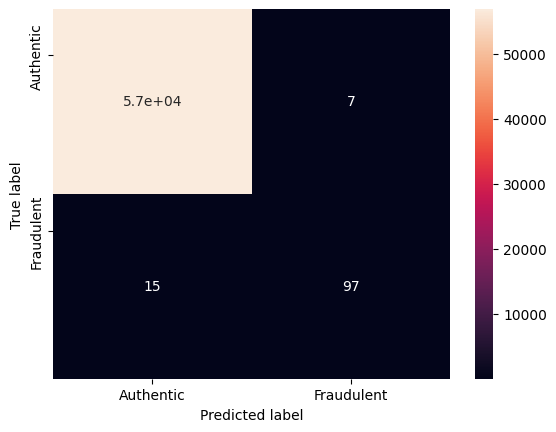

In [174]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion_rf_2, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

### Q4-2. 파라미터 튜닝 적용한 모델의 performance metric score를 출력하고 저장하기

In [179]:
def performance_metric(confusion_matrix):
    
    TN_rf2 = confusion_matrix[0, 0]
    FP_rf2 = confusion_matrix[0, 1]
    FN_rf2 = confusion_matrix[1, 0]
    TP_rf2 = confusion_matrix[1, 1]

    accuracy_rf2 = (TP_rf2 + TN_rf)/(TP_rf2 + FN_rf2 + TN_rf2 + FP_rf2)

    if (FP_rf2 + TP_rf2 == 0):
        precision_rf2 = float('NaN')
    else:
        precision_rf2 = TP_rf2/(TP_rf2 + FP_rf2)
        
    if (TP_rf2 + FN_rf2 == 0):
        recall_rf2 = float('NaN')
    else:
        recall_rf2 = TP_rf2/(TP_rf2 + FN_rf2)
    return accuracy_rf2, precision_rf2, recall_rf2, TP_rf2, FN_rf2, TN_rf2, FP_rf2
accuracy_rf2, precision_rf2, recall_rf2, TP_rf2, FN_rf2, TN_rf2, FP_rf2 = performance_metric(confusion_rf_2)
print(f'Accuracy:{accuracy_rf2:.2f}, Precision: {precision_rf2:.3f}, Recall: {recall_rf2:.3f}')
# Accuracy:1.00, Precision: 0.873, Recall: 0.857
# Accuracy:0.999, Precision: 0.933, Recall: 0.866 -- 20,2,50

Accuracy:1.00, Precision: 0.933, Recall: 0.866


In [181]:

new_row = {"Model": "RandomForest2", "Accuracy":1.00,"Precision":0.933,"Recall": 0.866} ### Q4-2 답안을 작성하세요 ####
models.loc[len(models)] = new_row
models

,Model,Accuracy,Precision,Recall
0,RandomForest,1.0,0.873,0.857
1,RandomForest2,1.0,0.933,0.866


In [183]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP_rf2, FN_rf2],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN_rf2, FP_rf2],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()

### Logistic Regression
- 랜덤 오버 샘플링 적용

In [184]:
from sklearn.linear_model import LogisticRegression 

model_over= LogisticRegression(solver= 'lbfgs').fit(X_train_over, y_train_over)

print('Train Accuracy : ', model_over.score(X_train_over, y_train_over))
print('Test Accuracy : ',model_over.score(X_test, y_test))



Train Accuracy :  0.9394192513133889
Test Accuracy :  0.9604297601910046


In [185]:
pred_train_over = model_over.predict(X_train_over)
pred_test_over = model_over.predict(X_test)
pred_test_over

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [186]:
from sklearn.metrics import confusion_matrix

confusion_over = confusion_matrix(y_test, pred_test_over)


print('<Confusion matrix>')
print(confusion_over)

<Confusion matrix>
[[54604  2246]
 [    8   104]]


Text(50.722222222222214, 0.5, 'True label')

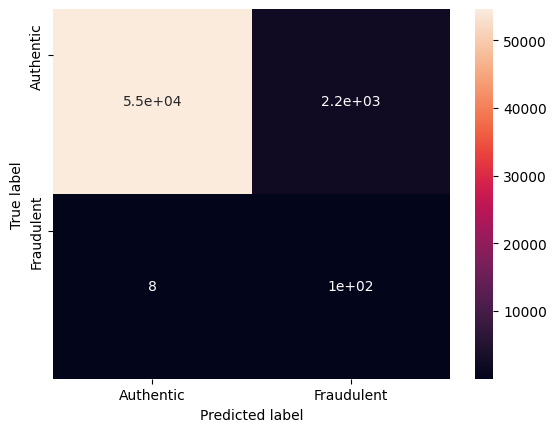

In [187]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion_over, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

### Q5. linear regression 모델의 performance metric score를 출력하고 저장하기

In [189]:
def performance_metric(confusion_over):
    
    TN_over = confusion_over[0, 0]
    FP_over = confusion_over[0, 1]
    FN_over = confusion_over[1, 0]
    TP_over = confusion_over[1, 1]

    accuracy_over = (TP_over + TN_over) / (TP_over + TN_over + FP_over + FN_over)
    precision_over = TP_over / (TP_over + FP_over)
    recall_over = TP_over / (TP_over + FN_over) 

    
    return accuracy_over, precision_over, recall_over, TP_over, FN_over, TN_over, FP_over

    
accuracy_over, precision_over, recall_over, TP_over, FN_over, TN_over, FP_over = performance_metric(confusion_over)
print(f'Accuracy:{accuracy_over:.2f}, Precision: {precision_over:.3f}, Recall: {recall_over:.3f}') ### Q5답안을 작성하세요 ####

Accuracy:0.96, Precision: 0.044, Recall: 0.929


In [190]:
new_row = {"Model": "Linear Regression", "Accuracy":0.96,"Precision":0.044,"Recall":0.929} ### Q5답안을 작성하세요 ####
models.loc[len(models)] = new_row
models

,Model,Accuracy,Precision,Recall
0,RandomForest,1.00,0.873,0.857
1,RandomForest2,1.00,0.933,0.866
2,Linear Regression,0.96,0.044,0.929


In [191]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP_over, FN_over],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN_over, FP_over],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()

### Ridge Classifier

In [192]:
ridge = RidgeClassifier()

In [193]:

ridge_model = ridge.fit(X_train, y_train)

print('Train Accuracy : ', ridge_model.score(X_train, y_train))
print('Test Accuracy : ',ridge_model.score(X_test, y_test))

Train Accuracy :  0.9988852070486515
Test Accuracy :  0.99875355500158


In [194]:
pred_train_ridge = ridge_model.predict(X_train)
pred_test_ridge = ridge_model.predict(X_test)
pred_test_ridge

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
from sklearn.metrics import confusion_matrix

confusion_ridge = confusion_matrix(y_test, pred_test_ridge)


print('<Confusion matrix>')
print(confusion_ridge)

<Confusion matrix>
[[56843     7]
 [   64    48]]


Text(50.722222222222214, 0.5, 'True label')

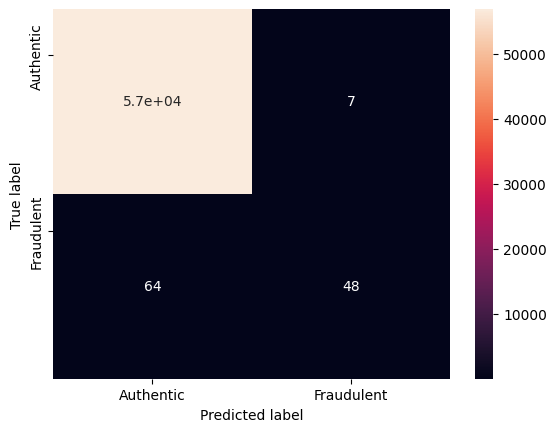

In [196]:
import seaborn as sns
class_names = ['Authentic', 'Fraudulent']
sns.heatmap(confusion_ridge, annot = True)
tick_marks_y = [0.25, 1.2]
tick_marks_x = [0.5, 1.5]

plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
plt.xlabel("Predicted label")
plt.ylabel("True label")

### Q6. Ridge regression 모델의 performance metric score를 출력하고 저장하기

In [201]:
def performance_metric(confusion_ridge):
    
    TN_ridge = confusion_ridge[0, 0]
    FP_ridge = confusion_ridge[0, 1]
    FN_ridge = confusion_ridge[1, 0]
    TP_ridge = confusion_ridge[1, 1]

    accuracy_ridge = (TP_ridge + TN_ridge) / (TP_ridge + TN_ridge + FP_ridge + FN_ridge)
    precision_ridge = TP_ridge / (TP_ridge + FP_ridge)
    recall_ridge = TP_ridge / (TP_ridge + FN_ridge) 

    return accuracy_ridge, precision_ridge, recall_ridge, TP_ridge, FN_ridge, TN_ridge, FP_ridge

    
accuracy_ridge, precision_ridge, recall_ridge, TP_ridge, FN_ridge, TN_ridge, FP_ridge = performance_metric(confusion_ridge)
print(f'Accuracy:{accuracy_ridge:.2f}, Precision: {precision_ridge:.3f}, Recall: {recall_ridge:.3f}')### Q6답안을 작성하세요 ####

Accuracy:1.00, Precision: 0.873, Recall: 0.429


In [202]:
new_row = {"Model": "Ridge Regression", "Accuracy":1.00,"Precision":0.873,"Recall":0.429}### Q6답안을 작성하세요 ####
models.loc[len(models)] = new_row
models

,Model,Accuracy,Precision,Recall
0,RandomForest,1.00,0.873,0.857
1,RandomForest2,1.00,0.933,0.866
2,Linear Regression,0.96,0.044,0.929
3,Ridge Regression,1.00,0.873,0.429


In [203]:
fig1 = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig1.add_trace(go.Pie(
    labels = ['TP', 'FN'],
    values = [TP_ridge, FN_ridge],
    domain = dict(x = [0, 0.4]),
    name = 'Positive Class'), 
    row = 1, col = 1)

fig1.add_trace(go.Pie(
    labels = ['TN', 'FP'],
    values = [TN_ridge, FP_ridge],
    domain = dict(x = [0.4, 0.8]),
    name = 'Negative Class'),
    row = 1, col = 2)

fig1.update_layout(height = 450, showlegend = True)
fig1.show()

### Q7. random forest, GridSearch 적용한 Random forest, linear regression, ridge regression 모델들의 performance score 출력

In [204]:
models

,Model,Accuracy,Precision,Recall
0,RandomForest,1.00,0.873,0.857
1,RandomForest2,1.00,0.933,0.866
2,Linear Regression,0.96,0.044,0.929
3,Ridge Regression,1.00,0.873,0.429


### Q8. 위의 결과를 보고 신용카드 사기 거래 탐지를 더 잘하기 위해서는 어떤 모델을 사용해야할까요? 그 이유도 작성해주세요.

### answer : 예를 들어 1개의 거래만 ‘사기’라고 예측해서 실제로 맞히면 Precision은 1(100%) 입니다. 반면에 전체 거래가 ‘사기’라고 예측하면 Recall은 무조건 1(100%) 입니다. 이 각각의 지표가 갖는 바가 중요합니다. Precision을 높이면 Recall이 낮아지고, 반대로 Recall을 높이면 Precision이 낮아질 수 밖에 없는 관계다. 그래서 Precision, Recall 중 어느 하나에 치우친 지표가 아니라 Precision과 Recall의 조화평균인 F1-score를 가장 중요한 평가지표로 다룰 것입니다. 이 때 밑에 코드에서 보듯 F1-score가 가장 높은 RandomForest2를 사용할 것이다.

In [7]:
# F1-score
print("RandomForest - [F1-score]:",2*((0.873*0.857)/(0.873+0.857)))
print("RandomForest2 - [F1-score]:",2*((0.933*0.866)/(0.933+0.866)))
print("Linear Regression - [F1-score]:",2*((0.044*0.929)/(0.044+0.929)))
print("Ridge Regression - [F1-score]:",2*((0.873*0.429)/(0.873+0.429)))

RandomForest - [F1-score]: 0.8649260115606936
RandomForest2 - [F1-score]: 0.8982523624235688
Linear Regression - [F1-score]: 0.08402055498458376
Ridge Regression - [F1-score]: 0.575294930875576
